In [2]:
import pandas as pd
import numpy as np
import glob
import pandas as pd
import re
import matplotlib.pyplot as plt

C:\Users\Kieran\AppData\Local\Temp\ipykernel_35928\1242303556.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  all_dfs = [pd.read_csv(file) for file in csv_files]


Combined dataset shape: (968048, 81)


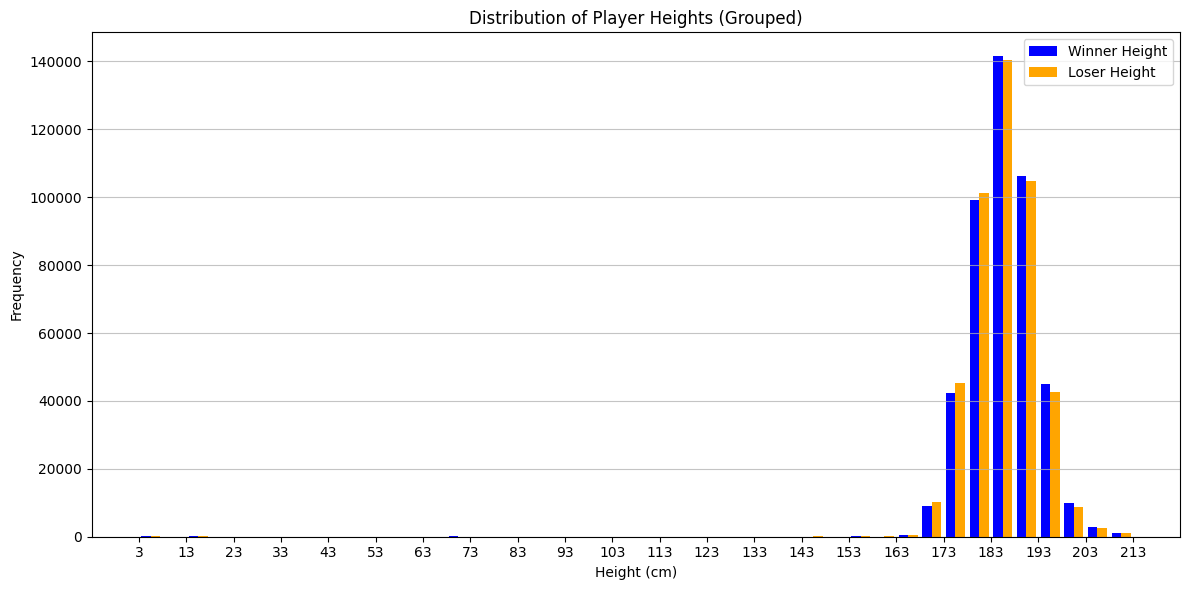

In [14]:
# Find all ATP matches CSV files in ./data
csv_files = glob.glob('./data/atp_matches_*.csv')

# Combine all ATP matches CSV files into a single DataFrame
all_dfs = [pd.read_csv(file) for file in csv_files]
big_df = pd.concat(all_dfs, ignore_index=True)
print(f"Combined dataset shape: {big_df.shape}")

# Drop missing values for heights
heights_df = big_df[['winner_ht', 'loser_ht']].dropna()

# Define common bins for both groups
bins = np.arange(min(heights_df.min()), max(heights_df.max()) + 5, 5)

# Calculate histogram counts
winner_counts, _ = np.histogram(heights_df['winner_ht'], bins=bins)
loser_counts, _ = np.histogram(heights_df['loser_ht'], bins=bins)

# Calculate bar positions (grouped)
bin_centers = (bins[:-1] + bins[1:]) / 2
bar_width = 2  # smaller than bin size to fit both side by side

plt.figure(figsize=(12, 6))
plt.bar(bin_centers - bar_width/2, winner_counts, width=bar_width, label='Winner Height', color='blue')
plt.bar(bin_centers + bar_width/2, loser_counts, width=bar_width, label='Loser Height', color='orange')
plt.xticks(np.arange(bins[0], bins[-1]+1, 10))

plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Heights (Grouped)')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()



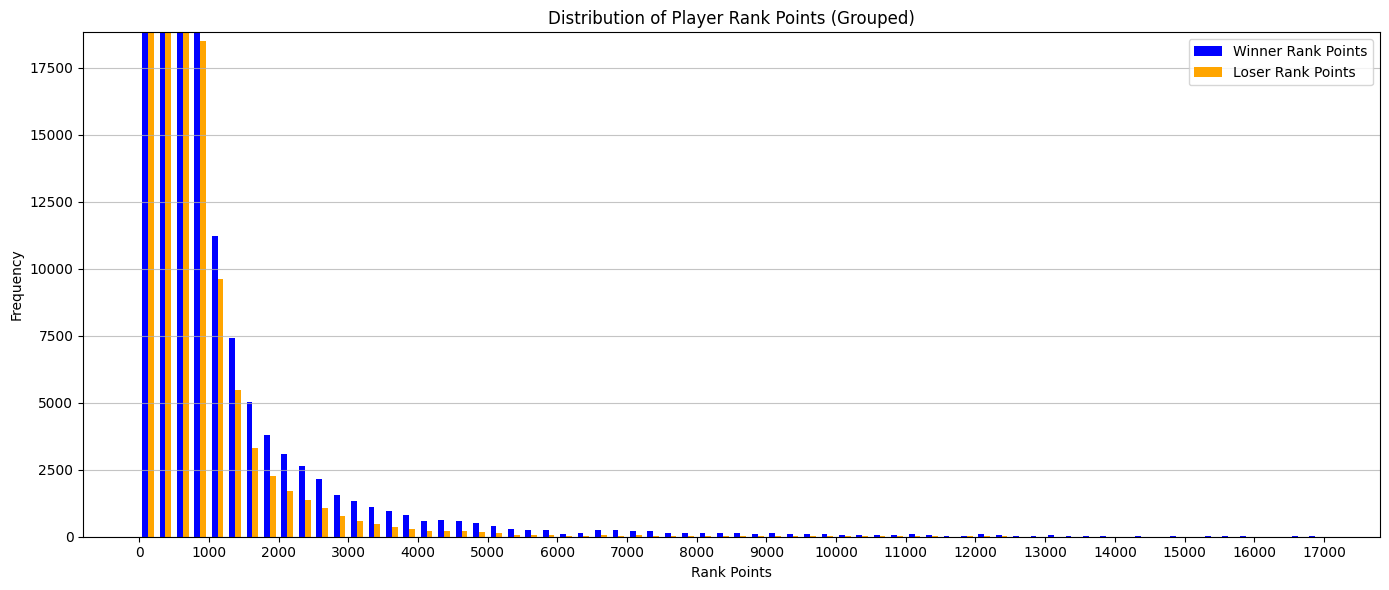

In [18]:
# Drop missing values for rank points
rank_df = big_df[['winner_rank_points', 'loser_rank_points']].dropna()

# Define common bins
bins = np.arange(min(rank_df.min()), max(rank_df.max()) + 250, 250)

# Histogram counts
winner_counts, _ = np.histogram(rank_df['winner_rank_points'], bins=bins)
loser_counts, _ = np.histogram(rank_df['loser_rank_points'], bins=bins)

# Bin positions
bin_centers = (bins[:-1] + bins[1:]) / 2
bar_width = (bins[1] - bins[0]) / 3

plt.figure(figsize=(14, 6))
plt.bar(bin_centers - bar_width/2, winner_counts, width=bar_width, label='Winner Rank Points', color='blue')
plt.bar(bin_centers + bar_width/2, loser_counts, width=bar_width, label='Loser Rank Points', color='orange')

plt.xlabel('Rank Points')
plt.ylabel('Frequency')
plt.title('Distribution of Player Rank Points (Grouped)')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(int(bins[0]), int(bins[-1]) + 1, 1000))

# 🔸 Scale down y-axis — e.g., show only up to the 95th percentile of bar heights
y_max = np.percentile(np.concatenate([winner_counts, loser_counts]), 95)
plt.ylim(0, y_max)

plt.tight_layout()
plt.show()

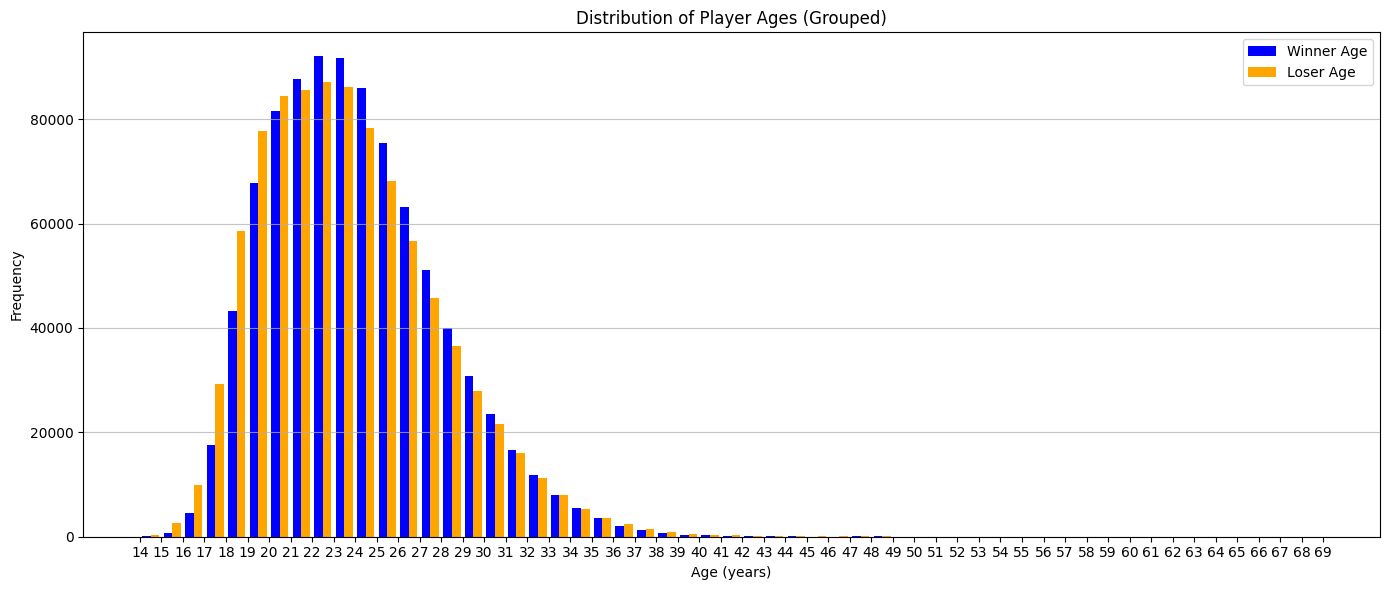

In [8]:
# Drop missing values for ages
age_df = big_df[['winner_age', 'loser_age']].dropna()

# Define bins — 1 year intervals
bins = np.arange(int(age_df.min().min()), int(age_df.max().max()) + 1, 1)

# Histogram counts
winner_counts, _ = np.histogram(age_df['winner_age'], bins=bins)
loser_counts, _ = np.histogram(age_df['loser_age'], bins=bins)

# Bin positions
bin_centers = (bins[:-1] + bins[1:]) / 2
bar_width = 0.4

plt.figure(figsize=(14, 6))
plt.bar(bin_centers - bar_width/2, winner_counts, width=bar_width, label='Winner Age', color='blue')
plt.bar(bin_centers + bar_width/2, loser_counts, width=bar_width, label='Loser Age', color='orange')

plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ages (Grouped)')
plt.legend()
plt.grid(axis='y', alpha=0.75)

# 🔸 Make x-axis have more tick marks (e.g., 1-year steps)
plt.xticks(np.arange(int(bins[0]), int(bins[-1]) + 1, 1))

plt.tight_layout()
plt.show()

In [ ]:


# Numeric columns: compute means for winners and losers
numeric_cols = [
    'winner_rank', 'loser_rank',
    'winner_rank_points', 'loser_rank_points',
    'winner_age', 'loser_age',
    'winner_ht', 'loser_ht',
    'w_ace', 'l_ace',
    'w_df', 'l_df',
    'w_svpt', 'l_svpt',
    'w_1stIn', 'l_1stIn',
    'w_1stWon', 'l_1stWon',
    'w_2ndWon', 'l_2ndWon',
    'w_SvGms', 'l_SvGms',
    'w_bpSaved', 'l_bpSaved',
    'w_bpFaced', 'l_bpFaced'
    # Only include extended stats if present in the dataframe
]

all_means = []

yearly_means = {}

for file in csv_files:
    df = pd.read_csv(file)
    # Extract year from filename (e.g., atp_matches_2020.csv)
    match = re.search(r'atp_matches_(\d{4})', file)
    year = match.group(1) if match else None

    means = {}
    for col in numeric_cols:
        if col in df.columns:
            means[col] = df[col].mean()
            # Handle winner_/loser_ and w_/l_ pairs
            if col.startswith('w_'):
                loser_col = 'l_' + col[2:]
                if loser_col in df.columns:
                    means[loser_col] = df[loser_col].mean()
            elif col.startswith('l_'):
                winner_col = 'w_' + col[2:]
                if winner_col in df.columns:
                    means[winner_col] = df[winner_col].mean()
            elif col.startswith('winner_'):
                loser_col = 'loser_' + col[7:]
                if loser_col in df.columns:
                    means[loser_col] = df[loser_col].mean()
            elif col.startswith('loser_'):
                winner_col = 'winner_' + col[6:]
                if winner_col in df.columns:
                    means[winner_col] = df[winner_col].mean()
    all_means.append(means)

    # Store means by year if year is found
    if year:
        yearly_means.setdefault(year, []).append(means)

# Print averages for each year
print("\n--- Yearly Average Numeric Stats ---")
for year in sorted(yearly_means.keys()):
    year_means_df = pd.DataFrame(yearly_means[year])
    year_avg = year_means_df.mean()
    print(f"\nYear: {year}")
    for col in numeric_cols:
        if col in year_avg:
            if col.startswith('winner_'):
                loser_col = 'loser_' + col[len('winner_'):]
                if loser_col in year_avg:
                    print(f"{col} mean: {year_avg[col]:.2f} | {loser_col} mean: {year_avg[loser_col]:.2f}")
                else:
                    print(f"{col} mean: {year_avg[col]:.2f}")
            elif col.startswith('w_'):
                loser_col = 'l_' + col[len('w_'):]
                if loser_col in year_avg:
                    print(f"{col} mean: {year_avg[col]:.2f} | {loser_col} mean: {year_avg[loser_col]:.2f}")
                else:
                    print(f"{col} mean: {year_avg[col]:.2f}")
            elif col.startswith('loser_'):
                winner_col = 'winner_' + col[len('loser_'):]
                if winner_col not in numeric_cols:
                    print(f"{col} mean: {year_avg[col]:.2f}")
            elif col.startswith('l_'):
                winner_col = 'w_' + col[len('l_'):]
                if winner_col not in numeric_cols:
                    print(f"{col} mean: {year_avg[col]:.2f}")

# Compute the average of all datasets
means_df = pd.DataFrame(all_means)
average_means = means_df.mean()

print("\n--- Average Numeric Stats Across All Datasets ---")
for col in numeric_cols:
    # Handle winner_/loser_ pairs
    if col.startswith('winner_'):
        loser_col = 'loser_' + col[len('winner_'):]
        if loser_col in average_means:
            print(f"{col} mean: {average_means[col]:.2f} | {loser_col} mean: {average_means[loser_col]:.2f}")
        else:
            print(f"{col} mean: {average_means[col]:.2f}")
    # Handle w_/l_ pairs
    elif col.startswith('w_'):
        loser_col = 'l_' + col[len('w_'):]
        if loser_col in average_means:
            print(f"{col} mean: {average_means[col]:.2f} | {loser_col} mean: {average_means[loser_col]:.2f}")
        else:
            print(f"{col} mean: {average_means[col]:.2f}")
    # Handle loser_/winner_ pairs (if not already printed)
    elif col.startswith('loser_'):
        winner_col = 'winner_' + col[len('loser_'):]
        if winner_col not in numeric_cols:
            print(f"{col} mean: {average_means[col]:.2f}")
    # Handle l_/w_ pairs (if not already printed)
    elif col.startswith('l_'):
        winner_col = 'w_' + col[len('l_'):]
        if winner_col not in numeric_cols:
            print(f"{col} mean: {average_means[col]:.2f}")

C:\Users\Kieran\AppData\Local\Temp\ipykernel_78964\2371675062.py:31: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)



--- Yearly Average Numeric Stats ---

Year: 1968
winner_rank mean: nan | loser_rank mean: nan
winner_rank_points mean: nan | loser_rank_points mean: nan
winner_age mean: 25.81 | loser_age mean: 25.44
winner_ht mean: 182.47 | loser_ht mean: 182.65
w_ace mean: nan | l_ace mean: nan
w_df mean: nan | l_df mean: nan
w_svpt mean: nan | l_svpt mean: nan
w_1stIn mean: nan | l_1stIn mean: nan
w_1stWon mean: nan | l_1stWon mean: nan
w_2ndWon mean: nan | l_2ndWon mean: nan
w_SvGms mean: nan | l_SvGms mean: nan
w_bpSaved mean: nan | l_bpSaved mean: nan
w_bpFaced mean: nan | l_bpFaced mean: nan

Year: 1969
winner_rank mean: nan | loser_rank mean: nan
winner_rank_points mean: nan | loser_rank_points mean: nan
winner_age mean: 26.12 | loser_age mean: 25.85
winner_ht mean: 182.43 | loser_ht mean: 182.61
w_ace mean: nan | l_ace mean: nan
w_df mean: nan | l_df mean: nan
w_svpt mean: nan | l_svpt mean: nan
w_1stIn mean: nan | l_1stIn mean: nan
w_1stWon mean: nan | l_1stWon mean: nan
w_2ndWon mean: nan |